### Importing Libraries

In [1]:
#importing libraries
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from IPython.core.display import HTML
from stargazer.stargazer import Stargazer
import statsmodels.nonparametric.kernel_regression as loess

from mizani.transforms import log_trans
from mizani.formatters import percent_format
from mizani.formatters import log_format

warnings.filterwarnings("ignore")

# Data Work

In [2]:
#had to convert 'morg2014.csv' to zip as was too large for github.
data = pd.read_csv('ezyzip.zip')

In [3]:
df=pd.DataFrame(data)
df

,hhid,intmonth,hurespli,minsamp,hrlonglk,hrsample,hrhhid2,serial,hhnum,state,...,ym_file,ym,ch02,ch35,ch613,ch1417,ch05,ihigrdc,docc00,dind02
0,2600310997690,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,648,633,0,0,0,0,0,18.0,NaN,NaN
1,2600310997690,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,648,633,0,0,0,0,0,16.0,NaN,NaN
2,2600310997690,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,648,633,0,0,0,0,0,16.0,Business and financial operations occupations,Administrative and support services
3,41110310970391,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,648,633,0,0,0,0,0,12.0,NaN,NaN
4,75680310997590,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,648,633,1,0,1,0,1,14.0,Office and administrative support occupations,"Health care services , except hospitals"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317051,907086820569600,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,659,644,0,0,1,0,0,18.0,Management occupations,Public Administration
317052,907086820569600,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,659,644,0,0,1,0,0,16.0,Management occupations,"Health care services , except hospitals"
317053,947056861569890,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,659,644,0,0,0,0,0,16.0,NaN,NaN
317054,950868097156649,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,659,644,0,0,0,0,0,14.0,Office and administrative support occupations,Hospitals


In [4]:
#occupations: mechincal engineers(1460), civil engineers(1360)
data.loc[((data["occ2012"] == 1460) | (data['occ2012'] == 1360)), 'sample'] = 1
#sample == 1
data.loc[data["sample"].isna(), "sample"] = 0 # were NAs input zeros
# sample == 0
data

,hhid,intmonth,hurespli,minsamp,hrlonglk,hrsample,hrhhid2,serial,hhnum,state,...,ym,ch02,ch35,ch613,ch1417,ch05,ihigrdc,docc00,dind02,sample
0,2600310997690,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,633,0,0,0,0,0,18.0,NaN,NaN,0.0
1,2600310997690,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,633,0,0,0,0,0,16.0,NaN,NaN,0.0
2,2600310997690,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,633,0,0,0,0,0,16.0,Business and financial operations occupations,Administrative and support services,0.0
3,41110310970391,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,633,0,0,0,0,0,12.0,NaN,NaN,0.0
4,75680310997590,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,633,1,0,1,0,1,14.0,Office and administrative support occupations,"Health care services , except hospitals",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317051,907086820569600,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,644,0,0,1,0,0,18.0,Management occupations,Public Administration,0.0
317052,907086820569600,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,644,0,0,1,0,0,16.0,Management occupations,"Health care services , except hospitals",0.0
317053,947056861569890,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,644,0,0,0,0,0,16.0,NaN,NaN,0.0
317054,950868097156649,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,8,...,644,0,0,0,0,0,14.0,Office and administrative support occupations,Hospitals,0.0


In [5]:
#DF with only mechanical and civil engineers
data = data.loc[data["sample"] == 1].reset_index(drop=True) #keep only sample == 1
data

,hhid,intmonth,hurespli,minsamp,hrlonglk,hrsample,hrhhid2,serial,hhnum,state,...,ym,ch02,ch35,ch613,ch1417,ch05,ihigrdc,docc00,dind02,sample
0,4540720924693,January,1.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,94,...,645,0,0,0,0,0,17.0,Architecture and engineering occupations,Professional and Technical services,1.0
1,51250720790591,January,2.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,94,...,645,0,0,0,1,0,18.0,Architecture and engineering occupations,Public Administration,1.0
2,70910760948099,January,1.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,93,...,645,0,1,0,0,1,16.0,Architecture and engineering occupations,Professional and Technical services,1.0
3,260177093001600,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,93,...,633,0,0,0,0,0,16.0,Architecture and engineering occupations,Petroleum and coal products,1.0
4,310864092903826,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,93,...,633,0,0,0,0,0,16.0,Architecture and engineering occupations,Hospitals,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,781317002850290,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,101,1011,1,1,5,...,644,0,0,0,0,0,12.0,Architecture and engineering occupations,Professional and Technical services,1.0
865,910043860569190,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,9,...,644,0,0,1,0,0,16.0,Architecture and engineering occupations,Transportation equipment manufacturing,1.0
866,235854026002304,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,9,...,644,0,1,1,0,1,18.0,Architecture and engineering occupations,Transportation equipment manufacturing,1.0
867,64554501500505,December,1.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,311,3111,1,1,5,...,656,0,0,1,0,0,16.0,Architecture and engineering occupations,Transportation equipment manufacturing,1.0


In [6]:
#value counts for mechanical/civil engineers occupations
data["sample"].value_counts()

sample
1.0    869
Name: count, dtype: int64

In [7]:
#creating variables; female, wages, lnwages(log of wages), agesq(age squared )
data["female"] = (data["sex"] == 2)
data["w"] = data["earnwke"] / data["uhourse"]
data["lnw"] = np.log(data["w"])
data["agesq"] = np.power(data["age"], 2)
data

,hhid,intmonth,hurespli,minsamp,hrlonglk,hrsample,hrhhid2,serial,hhnum,state,...,ch1417,ch05,ihigrdc,docc00,dind02,sample,female,w,lnw,agesq
0,4540720924693,January,1.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,94,...,0,0,17.0,Architecture and engineering occupations,Professional and Technical services,1.0,False,15.375000,2.732743,784
1,51250720790591,January,2.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,94,...,1,0,18.0,Architecture and engineering occupations,Public Administration,1.0,False,32.894737,3.493313,2304
2,70910760948099,January,1.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,93,...,0,1,16.0,Architecture and engineering occupations,Professional and Technical services,1.0,False,NaN,NaN,2601
3,260177093001600,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,93,...,0,0,16.0,Architecture and engineering occupations,Petroleum and coal products,1.0,False,26.920000,3.292870,2500
4,310864092903826,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,93,...,0,0,16.0,Architecture and engineering occupations,Hospitals,1.0,False,19.230750,2.956511,2809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,781317002850290,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,101,1011,1,1,5,...,0,0,12.0,Architecture and engineering occupations,Professional and Technical services,1.0,False,19.000000,2.944439,2704
865,910043860569190,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,9,...,0,0,16.0,Architecture and engineering occupations,Transportation equipment manufacturing,1.0,False,57.675000,4.054824,1936
866,235854026002304,December,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,9,...,0,1,18.0,Architecture and engineering occupations,Transportation equipment manufacturing,1.0,True,42.788250,3.756264,1296
867,64554501500505,December,1.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,311,3111,1,1,5,...,0,0,16.0,Architecture and engineering occupations,Transportation equipment manufacturing,1.0,False,30.769111,3.426511,1296


In [8]:
#seeing number of observations
data.shape

(869, 101)

## Modelling to see distribution of wages for engineers (male and female)

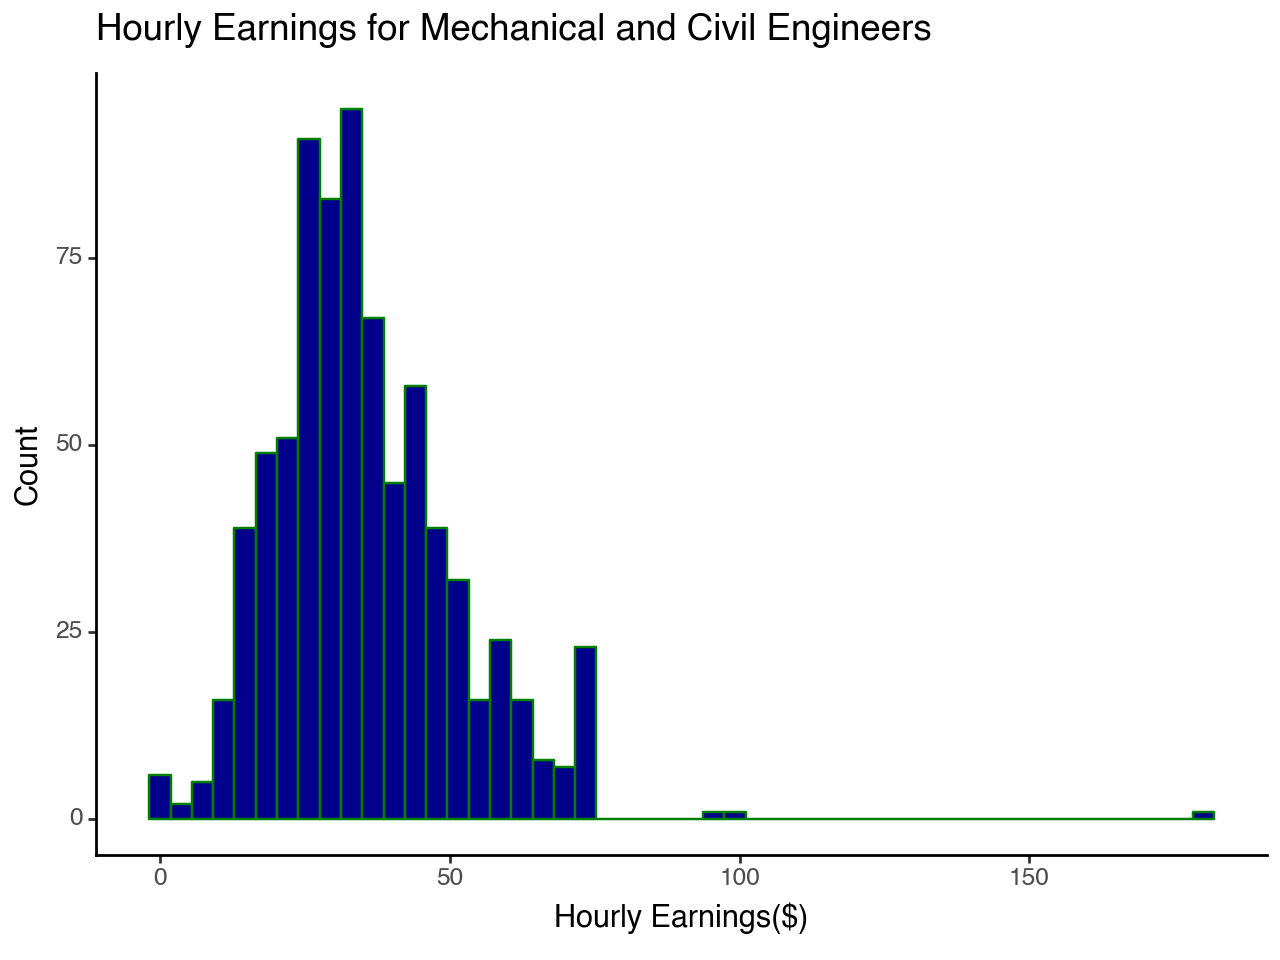

<Figure Size: (640 x 480)>

In [9]:
#distribution of wages
ggplot(data) + aes(x = 'w', y = 'stat(count)') +\
geom_histogram(color = 'green', fill = 'darkblue', bins=50) + theme_classic()+\
labs(title = 'Hourly Earnings for Mechanical and Civil Engineers', y = 'Count', x = 'Hourly Earnings($)')
#looking at the graph, I would say the distribution is not perfectly normal, but not too far off from normal

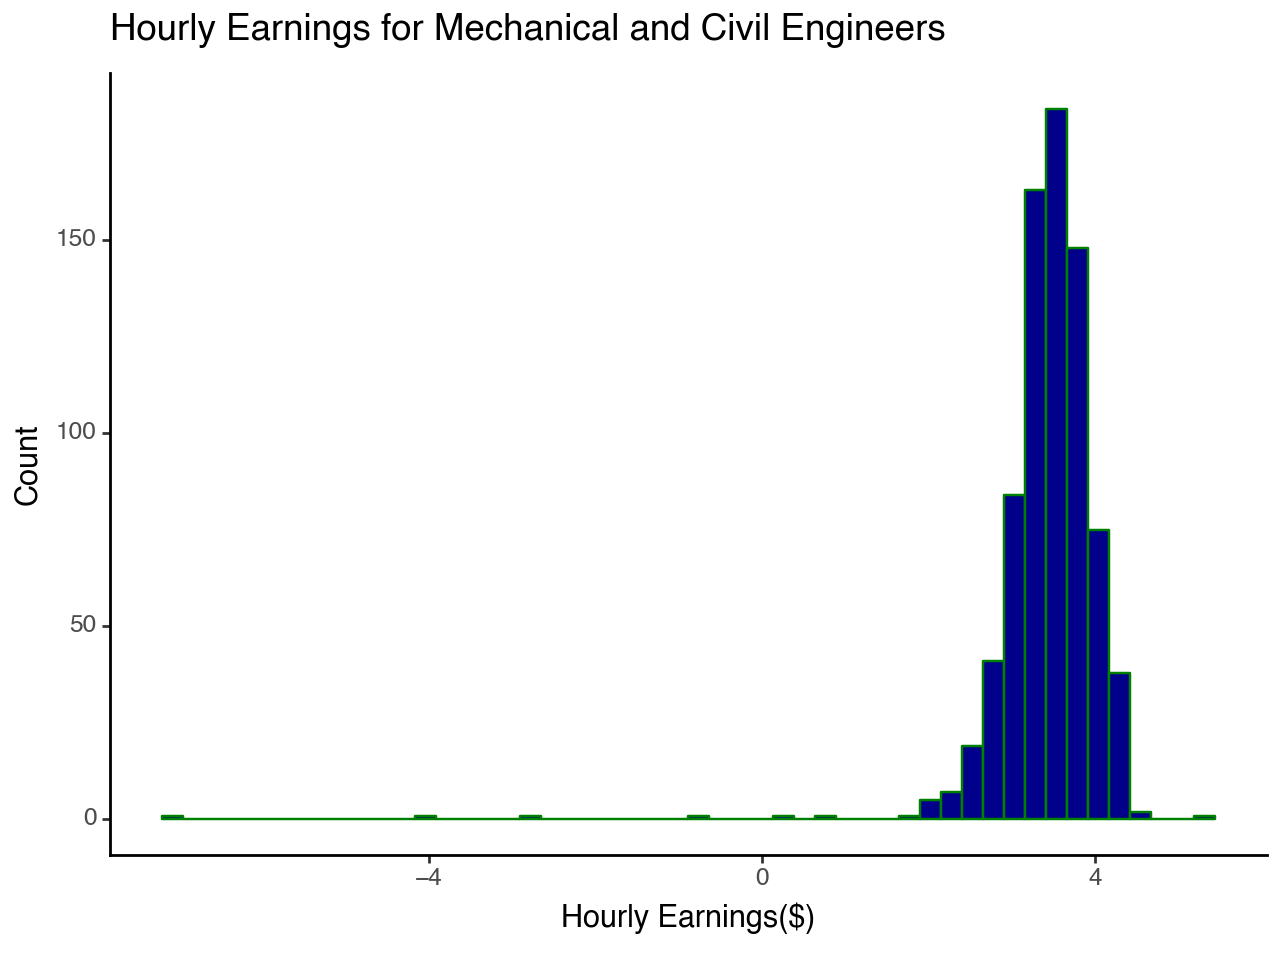

<Figure Size: (640 x 480)>

In [10]:
#taking the log of wages
ggplot(data) + aes(x = 'lnw', y = 'stat(count)') +\
geom_histogram(color = 'green', fill = 'darkblue', bins=50) + theme_classic()+\
labs(title = 'Hourly Earnings for Mechanical and Civil Engineers', y = 'Count', x = 'Hourly Earnings($)')
#After looking at this graph, I would say this data was better visualized by the level visualization

In [11]:
#more info about wages of engineers
data.loc[:, ["earnwke", "uhourse", "w", "lnw"]].describe()

,earnwke,uhourse,w,lnw
count,792.000000,808.000000,775.000000,775.000000
mean,1484.488321,42.438119,35.384717,-inf
std,650.731043,7.268689,16.066923,NaN
min,0.000000,0.000000,0.000000,-inf
25%,1057.000000,40.000000,25.000000,3.218876
50%,1384.610000,40.000000,32.779545,3.489805
75%,1923.000000,45.000000,43.698523,3.777314
max,2884.610000,90.000000,180.000000,5.192957


In [12]:
#seeing how many engineers are female
data["female"] = data["female"].astype(int)  #from boolean to 0,1
data["female"].value_counts()
#109 engineers are female. There are 869 total mechanical/civil engineers.
(109/869)*100
print(f"{(109/869)*100}% of mechanical and civil engineers are women")

12.543153049482164% of mechanical and civil engineers are women


## Modelling to see distribution of wages for engineers (male versus female)- gender gap

In [24]:
#Earnings of females (level-level regression)
reg1 = smf.ols(formula="w~female", data=data).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      w   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.488
Date:                Thu, 23 Nov 2023   Prob (F-statistic):              0.223
Time:                        12:47:29   Log-Likelihood:                -3250.4
No. Observations:                 775   AIC:                             6505.
Df Residuals:                     773   BIC:                             6514.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6587      0.619     57.594      0.000      34.443      36.874
female        -2.0821      1.707     -1.220      0.223      -5.432       1.268
==============================================================================
Omnibus:                      291.249   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2460.820
Skew:                           1.459   Prob(JB):                         0.00
Kurtosis:                      11.228   Cond. No.                         3.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Slope: female market analysts earn $ 2.08 less, on average than male market analysts in this data. However, R-squared only counts for .2% of the data- it doesn't look like gender accounts for much of the variability in wages...

In [29]:
#statistical inference
reg11 = smf.ols(formula="w~female", data=data).fit(cov_type="HC1") 
#heteroskedastic-consistent standard errors
reg11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      w   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.832
Date:                Thu, 23 Nov 2023   Prob (F-statistic):              0.176
Time:                        13:03:44   Log-Likelihood:                -3250.4
No. Observations:                 775   AIC:                             6505.
Df Residuals:                     773   BIC:                             6514.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6587      0.629     56.652      0.000      34.425      36.892
female        -2.0821      1.538     -1.354      0.176      -5.097       0.933
==============================================================================
Omnibus:                      291.249   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2460.820
Skew:                           1.459   Prob(JB):                         0.00
Kurtosis:                      11.228   Cond. No.                         3.02
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

Robust SE slope: 1.538, CI  [-5.097, 0.933] (wide)

-> in 2014 in the USA we can be 95% confident that the average difference between hourly earnings of female market analysts versus male was -5 to 1 USD ($).

-> the CI includes zero -> we cannot rule out with 95% confidence that their average earnings (female and male) are the same

->  |𝑡|=-1.35< 1.96
  cannot reject  𝐻0
 
-> it can be seen also by p-value >0.05
 
-> the coefficient cannot be considered statistically significant at 5% 

I got weird readings when attempting a lnw~female regression. So I have chosen to represent it as level-level only. 

# Summary
Looking at the level-level regression:

Slope: female mechanical/civil engineers earn $2 less, on average than male mechanical/civil engineers in this data

In 2014 in the USA we can be 95% confident that the average difference between hourly earnings of female mechanical/civil engineers  versus male was $-5 to $1. The CI includes 0 which means we can't say with 95% confidence that their average earnings (between males and females) are the not same. The t-stat for the robust SE regression is -1.3 which is less than 1.96 so we can't reject the H0 hypothesis. The p-value is also 0.176 which is much larger than 0.05. The coefficient can't be considered statistically significant at 5%. Also, the R-squared value is 0.002 meaning that the regression line only counts for a mere 0.2% of the data- not a great fit. 


## Modelling to see distribution of wages for engineers by highest level of education completed (male v. female)

In [39]:
data['grade92'].min() #32, 1st-4th grade
data['grade92'].max() #46, doctorate degree
data['grade92'].mean() #about 43, bachelor's degree
data['ed_low'] = ((data['grade92'] >= 32) & (data['grade92'] <= 34)).astype(int) #1st-middle school
data['ed_mid'] = ((data['grade92'] >= 35) & (data['grade92'] <= 39)).astype(int) #high school
data['ed_high'] = ((data['grade92'] >= 40) & (data['grade92'] <= 46)).astype(int)#college and higher

In [40]:
reg8 = smf.ols(formula="w~female", data=data).fit(cov_type="HC1")
reg9 = smf.ols(formula="w~female + ed_low + ed_mid", data=data).fit(cov_type="HC1") #ref group is ed_high
reg10 = smf.ols(formula="w~female + ed_low + ed_high", data=data).fit(cov_type="HC1") #ref group is ed_mid

In [41]:
stargazer = Stargazer([reg8, reg9, reg10])
stargazer.covariate_order(["female", "Intercept", 'ed_low', 'ed_mid', 'ed_high'])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

(2) [ed_high (college and above) is the comparison group], those with 1st-middle school education level are expected  to earn 9.13 dollars less on average than those with college degrees or higher. Those with some high school or a completed high school education are expected to earn on average 8.64 dollars less than those with college degrees or higher. 

(3) 
:
[ed_mid (high school) is the comparison group], those with 1st-middle school education level expected on average to earn 0.49 dollars less than those with some/all high school education level. Those with education levels of college or higher on average are expected to earn 8.6 dollars more than those with an education level of some/all high school.

estimated coefficient on female is LARGER (-2.149) when education is included

### Representing how gender gap varies with education level

In [85]:
data['education_level'] = ''

data.loc[(data['grade92'] >= 32) & (data['grade92'] <= 34), 'education_level'] = 'low'
data.loc[(data['grade92'] >= 35) & (data['grade92'] <= 39), 'education_level'] = 'middle'
data.loc[(data['grade92'] >= 40), 'education_level'] = 'high'

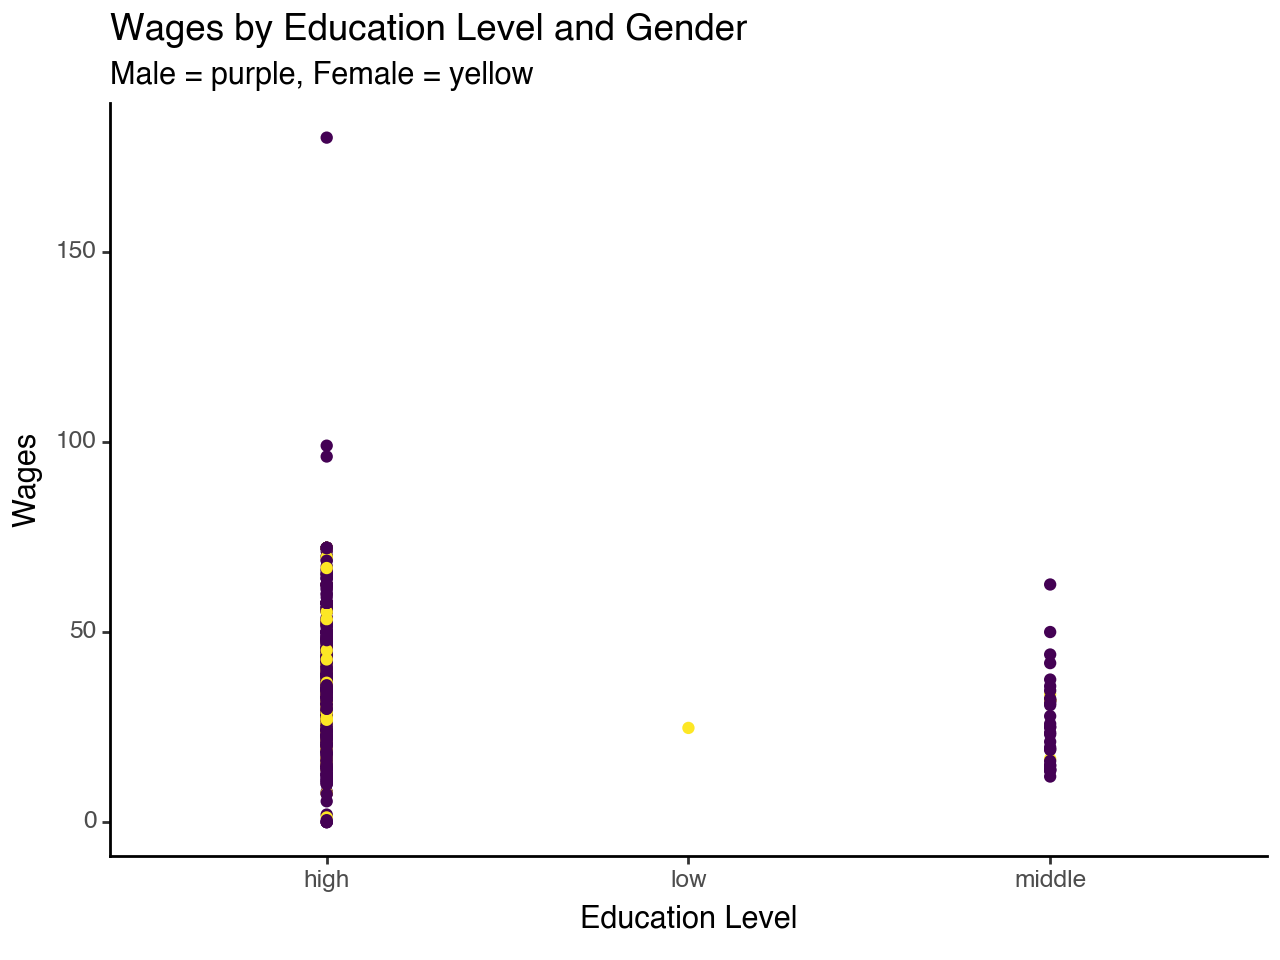

<Figure Size: (640 x 480)>

In [86]:
ggplot(data)+ aes(x ='education_level', y = 'w', color = 'female')+ geom_point() +theme_classic()+\
labs(title = 'Wages by Education Level and Gender', y= 'Wages', x = 'Education Level', subtitle = 'Male = purple, Female = yellow')+theme(legend_position = 'none')                                                                        
        

As we can see from both the regressions and the scatterplot, it doesn't seem as if the wages are heavily affected by gender. It is simple to see that the higher the education level, the higher the wage tends to be, however females seem to be randomly sprinkled in throughout the data to where it seems like being female doesn't have much to do with wages in this data. This data also doesn't seem to have many females included, so that may also be a reason why representing the data has proved to be more challenging.